# Implementing logistic regression using numpy library

### Importing necessary/required libraries and reading dataset

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt                            # - for data exploration

In [ ]:
df = pd.read_csv("../content/Admission_Predict.csv.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


### Performing data exploration and pre-processing

In [ ]:
df = df.drop("Serial No.", axis = 1)
print(df.columns)

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')


In [ ]:
df.describe

<bound method NDFrame.describe of      GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0          337          118                  4  4.5   4.5  9.65         1   
1          324          107                  4  4.0   4.5  8.87         1   
2          316          104                  3  3.0   3.5  8.00         1   
3          322          110                  3  3.5   2.5  8.67         1   
4          314          103                  2  2.0   3.0  8.21         0   
..         ...          ...                ...  ...   ...   ...       ...   
395        324          110                  3  3.5   3.5  9.04         1   
396        325          107                  3  3.0   3.5  9.11         1   
397        330          116                  4  5.0   4.5  9.45         1   
398        312          103                  3  3.5   4.0  8.78         0   
399        333          117                  4  5.0   4.0  9.66         1   

     Chance of Admit   
0                

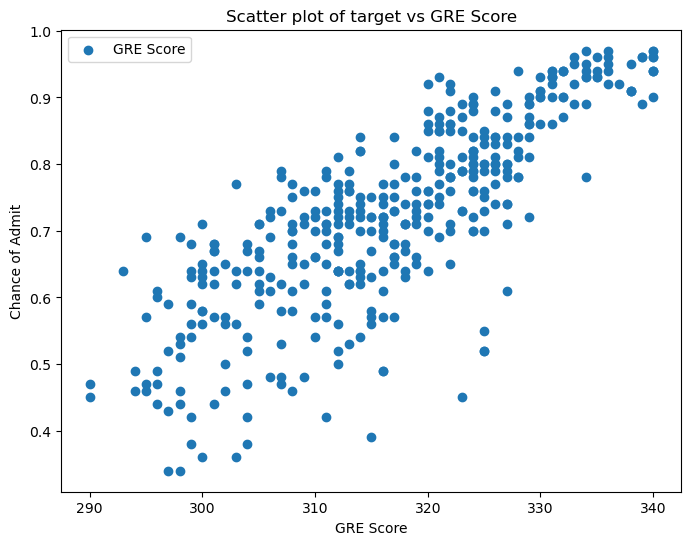

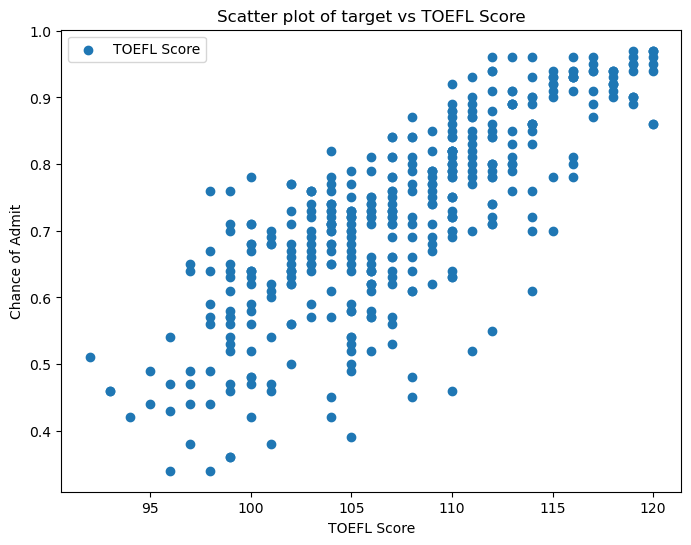

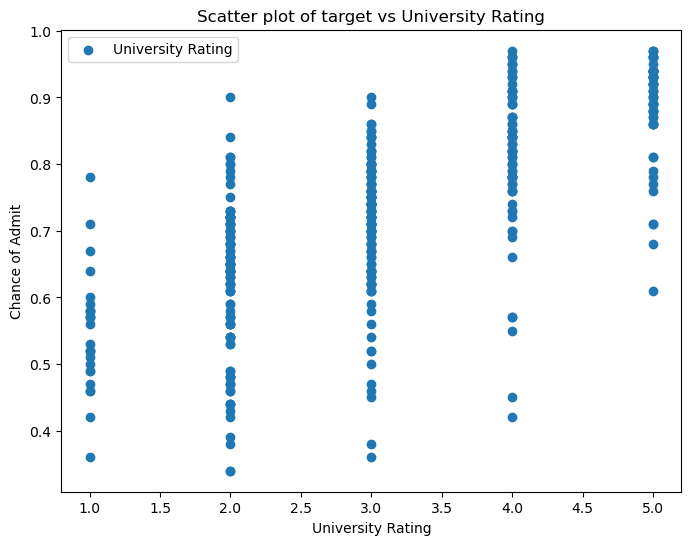

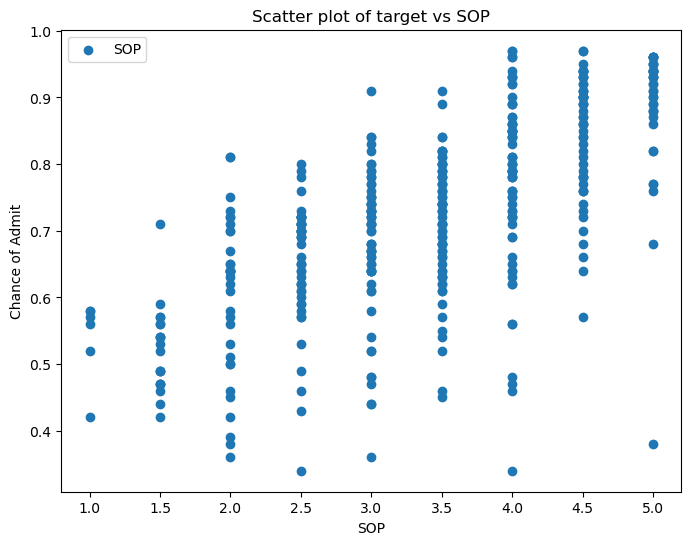

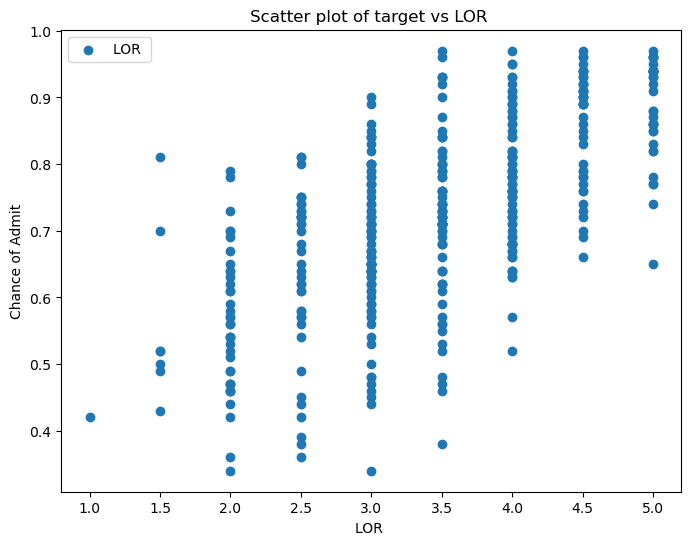

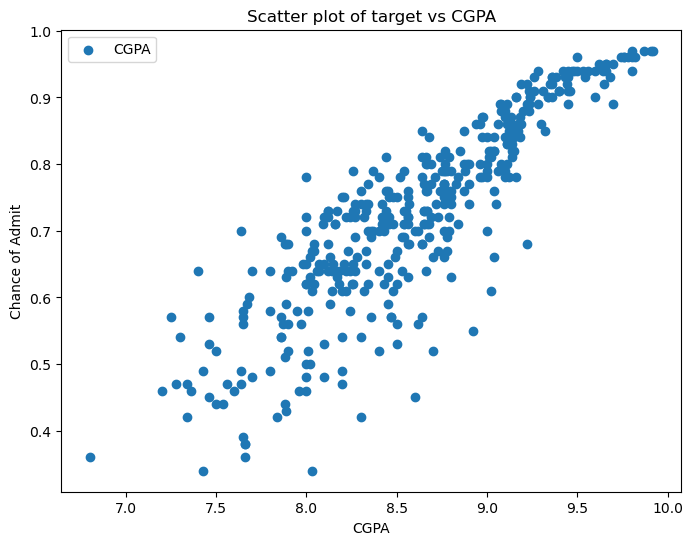

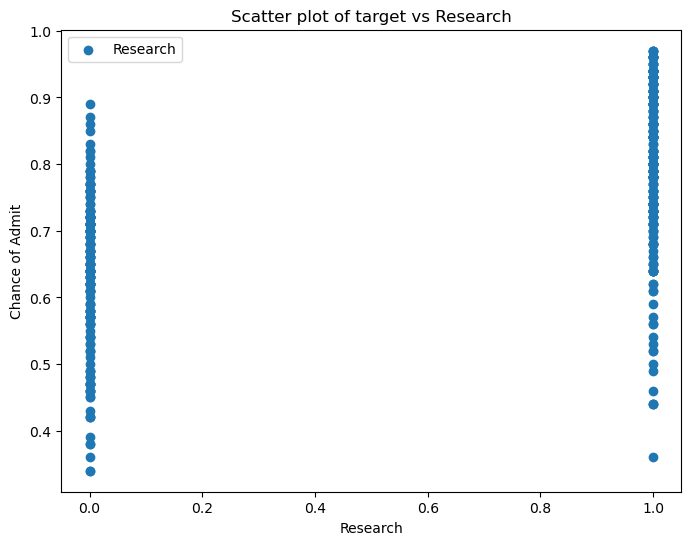

In [ ]:
features = df.columns.tolist()
features.remove('Chance of Admit ')                        # - target i.e. 'Y'

for feature in features:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[feature], df['Chance of Admit '], label=feature)
    plt.xlabel(feature)
    plt.ylabel('Chance of Admit')
    plt.title(f'Scatter plot of target vs {feature}')
    plt.legend()
    plt.show()

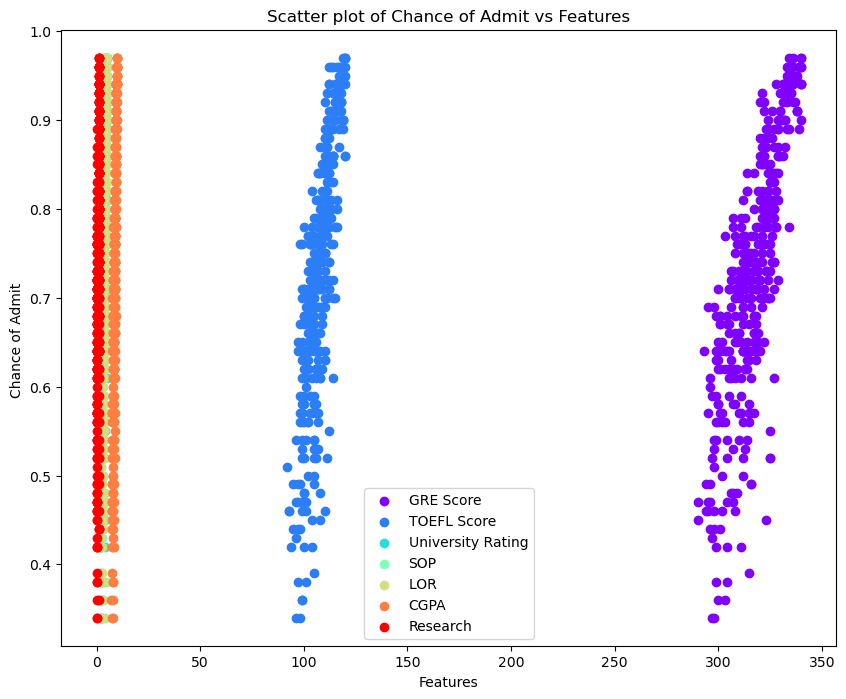

In [ ]:
plt.figure(figsize=(10, 8))
colors = plt.cm.rainbow(np.linspace(0, 1, len(features)))

for feature, color in zip(features, colors):
    plt.scatter(df[feature], df['Chance of Admit '], color=color, label=feature)

plt.xlabel('Features')
plt.ylabel('Chance of Admit ')
plt.title('Scatter plot of Chance of Admit vs Features')
plt.legend()
plt.show()

In [ ]:
df[features] = (df[features] - df[features].mean()) / df[features].std()  # - feature scaling

d = len(features)                                          # - number of features; generic instead of hard-coding
theta = np.random.rand(1, d + 1)                           # - random initialization of our theta's (vector)
print(theta)

X = df[features].values                                    # - numpy array for the features
print('Shape of X:', X.shape)
print('Shape of theta:', theta.shape)

Y = df['Chance of Admit ']
print(Y.shape)

[[0.89218832 0.47359329 0.43966593 0.78815976 0.36039539 0.38257842
  0.00694283 0.74331238]]
Shape of X: (400, 7)
Shape of theta: (1, 8)
(400,)


### Creating the logistic regression class

In [ ]:
class LogisticRegression:
    def __init__(self):
        self.theta = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def hypothesis(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), X))       # - adding bias term
        return self.sigmoid(np.dot(X, self.theta.T))

    def cost_function(self, Y, X):
        h = self.hypothesis(X)
        Y = Y.reshape(-1, 1)                               # - reshaping Y to match h's shape
        J = (-Y * np.log(h) - (1 - Y) * np.log(1 - h)).mean()
        return J

    def derivative(self, Y, X):
        h = self.hypothesis(X)
        Y = Y.reshape(-1, 1)                               # - reshaping Y to match h's shape
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        return np.dot((h - Y).T, X) / len(Y)

    def gradient_descent(self, derivative, lr=0.001):
        self.theta = self.theta - (lr * derivative)

    def train(self, X, Y, lr=0.1, num_iters=100, num_printing=10):
        self.theta = np.random.rand(1, X.shape[1] + 1)

        for i in range(num_iters):
            der = self.derivative(Y, X)
            self.gradient_descent(der, lr)

            if i % num_printing == 0:
                print(f"Iteration {i+1}/{num_iters}, Cost: {self.cost_function(Y, X)}")

    def predict_class(self, X):
        probabilities = self.hypothesis(X)
        return (probabilities >= 0.5).astype(int)

    def predict_confidence(self, X):
        probabilities = self.hypothesis(X)
        print("Confidence is:", probabilities * 100)
        return probabilities

    def get_weights(self):
        return self.theta.flatten()

### Testing and predicting on the Iris dataset

In [ ]:
iris = datasets.load_iris()                                # - loading iris dataset
X = iris.data
Y = iris.target

num_classes = len(np.unique(Y))                            # - doing the one-vs-all training and testing
accuracies = []

for i in range(num_classes):
    Y_binary = (Y == i).astype(int)                        # - creating binary labels for one-vs-all

    model = LogisticRegression()
    model.train(X, Y_binary, lr=0.001, num_iters=1000, num_printing=100)

    probabilities = model.predict_confidence(X)

    predictions = model.predict_class(X)
    #print("Class is:", predictions)
    accuracy = np.mean(predictions == Y_binary)
    accuracies.append(accuracy)

    print("\nWeights are:", model.get_weights())
    print(f"\nAccuracy for class {i}: {accuracy:.4f}\n\n")

Iteration 1/1000, Cost: 4.620517223787219
Iteration 101/1000, Cost: 1.574668720448689
Iteration 201/1000, Cost: 0.6079449478494126
Iteration 301/1000, Cost: 0.5224240491190824
Iteration 401/1000, Cost: 0.48771437613727775
Iteration 501/1000, Cost: 0.4589573304592173
Iteration 601/1000, Cost: 0.43293166760292007
Iteration 701/1000, Cost: 0.409160813834325
Iteration 801/1000, Cost: 0.38741571959925614
Iteration 901/1000, Cost: 0.36750231822580404
Confidence is: [[52.78518062]
 [52.5421596 ]
 [53.15790882]
 [49.32314935]
 [52.21445766]
 [50.09366604]
 [51.58667251]
 [50.71109209]
 [50.45549151]
 [49.765626  ]
 [52.0979396 ]
 [48.06302379]
 [51.21262608]
 [54.27117112]
 [58.68450574]
 [54.29444024]
 [57.09381857]
 [53.66944568]
 [50.6648012 ]
 [51.52752234]
 [48.96112916]
 [52.54244926]
 [57.43470186]
 [50.42308749]
 [42.82565805]
 [49.46370927]
 [50.72498236]
 [51.46906208]
 [53.35517649]
 [47.87714531]
 [48.44852602]
 [54.25083611]
 [49.80955008]
 [53.65493601]
 [50.65357519]
 [56.222282

In [ ]:
overall_accuracy = np.mean(accuracies)
print(f"Overall test accuracy: {overall_accuracy:.4f}")

Overall test accuracy: 0.6052
